In [1]:
import numpy as np
import pandas as pd
from pathlib import Path 

In [2]:
from data_utils import load_year_data, read_and_process_file, get_year_files
import logging

logger = logging.getLogger()
logger.setLevel(logging.WARN)

datafolder = Path("tucu")
year = 2000
year_files = get_year_files(year, datafolder)
df = load_year_data(year, datafolder)

In [3]:
df["dia"] = df["DOY"] + df["seconds"]/3600/24

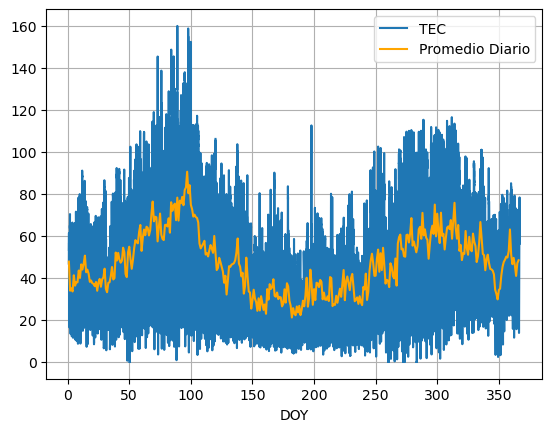

In [6]:
ax = df.plot(x="dia", y="TEC")
df.groupby("DOY").mean().plot(y="TEC", color="orange", ax=ax, label="Promedio Diario")
ax.grid()

<Axes: xlabel='seconds'>

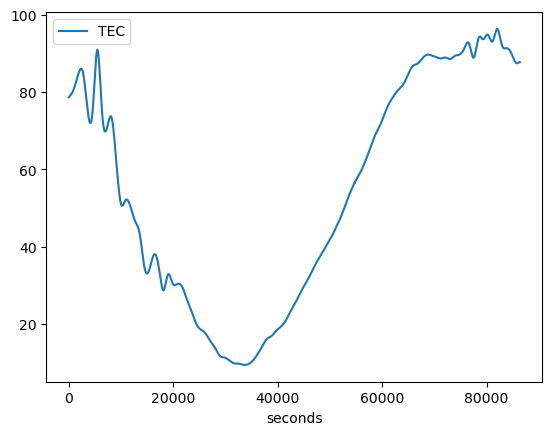

In [5]:
df.loc[df["DOY"] == 54].plot(x="seconds", y="TEC")